In [358]:
import pandas as pd
import numpy as np
import json
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
SURVEY_YEAR = "SurveyYear"

In [41]:
ALPHA_LEVEL = 0.005

In [6]:
survey_df = pd.concat([pd.read_csv("data/processed/ProcessedSurveyData_%d.csv" % i) for i in range(2020,2023)])

In [17]:
with open("data/raw/ds_survey/survey_cols.json", 'r') as f:
    survey_cols = json.load(f)

In [18]:
survey_cols

['Duration (in seconds)',
 'Age',
 'Gender',
 'Country',
 'IsStudent',
 'MOOCPlatforms_Coursera',
 'MOOCPlatforms_edX',
 'MOOCPlatforms_Kaggle Learn Courses',
 'MOOCPlatforms_DataCamp',
 'MOOCPlatforms_Fast.ai',
 'MOOCPlatforms_Udacity',
 'MOOCPlatforms_Udemy',
 'MOOCPlatforms_LinkedIn Learning',
 'MOOCPlatforms_Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 'MOOCPlatforms_University Courses (resulting in a university degree)',
 'MOOCPlatforms_None',
 'MOOCPlatforms_Other',
 'IntroToDSPlatform_University courses',
 'IntroToDSPlatform_Online courses (Coursera, EdX, etc)',
 'IntroToDSPlatform_Social media platforms (Reddit, Twitter, etc)',
 'IntroToDSPlatform_Video platforms (YouTube, Twitch, etc)',
 'IntroToDSPlatform_Kaggle (notebooks, competitions, etc)',
 'IntroToDSPlatform_None / I do not study data science',
 'IntroToDSPlatform_Other',
 'HighestEducation',
 'HasPublishedResearch',
 'TheoreticalResearch',
 'AppliedResearch',
 'NonMLResearch',
 'Programming

#### Why chi2_contingency?  You use chi2_contingency when you don't know the underlying distribution but you want to test whether two (or more) groups have the same distribution. You use chisquare when you have a distribution in mind and you want to test whether a group matches that distribution. [Link](https://stats.stackexchange.com/questions/110718/chi-squared-test-with-scipy-whats-the-difference-between-chi2-contingency-and)

In [189]:
def get_significant_changes(COL_FAMILY, plot_significant_only = True, ALPHA_LEVEL=0.005):
    TEST_VARS = [col for col in survey_cols if (COL_FAMILY in col and "None" not in col)]
    SIG_CHANGE_COLS = []
    # Keep only the rows for which the respondents have selected atleast 1 value in the MCQ
    test_df = survey_df.loc[(survey_df[TEST_VARS] == 1).any(axis=1), TEST_VARS+[SURVEY_YEAR]].fillna(0)
    for VAR in TEST_VARS:
        test_data = pd.crosstab(test_df['SurveyYear'],test_df[VAR],margins=False).to_numpy().T
        stat, p, dof, expected = chi2_contingency(test_data)
        SIG_CHANGE_COLS.append((VAR, p, stat))
    if plot_significant_only:
        SIG_CHANGE_COLS = [res for res in SIG_CHANGE_COLS if res[1]<ALPHA_LEVEL]
    N = len(SIG_CHANGE_COLS)
    plt.figure(figsize=(12, 12))
    for i in range(N):
        plt.subplot(N//3+1, 3, i+1)
        VAR = SIG_CHANGE_COLS[i][0]
        plot_df = pd.crosstab(test_df['SurveyYear'],test_df[VAR],margins=False).reset_index()
        plot_df["Adoption"] = plot_df[1]/(plot_df[0]+plot_df[1])
        plt.plot(plot_df[SURVEY_YEAR], plot_df["Adoption"]*100);
        plt.ylabel("Adoption (%)");
        plt.title(VAR +" (p-val %.2f)" % SIG_CHANGE_COLS[i][1]);
    plt.tight_layout()

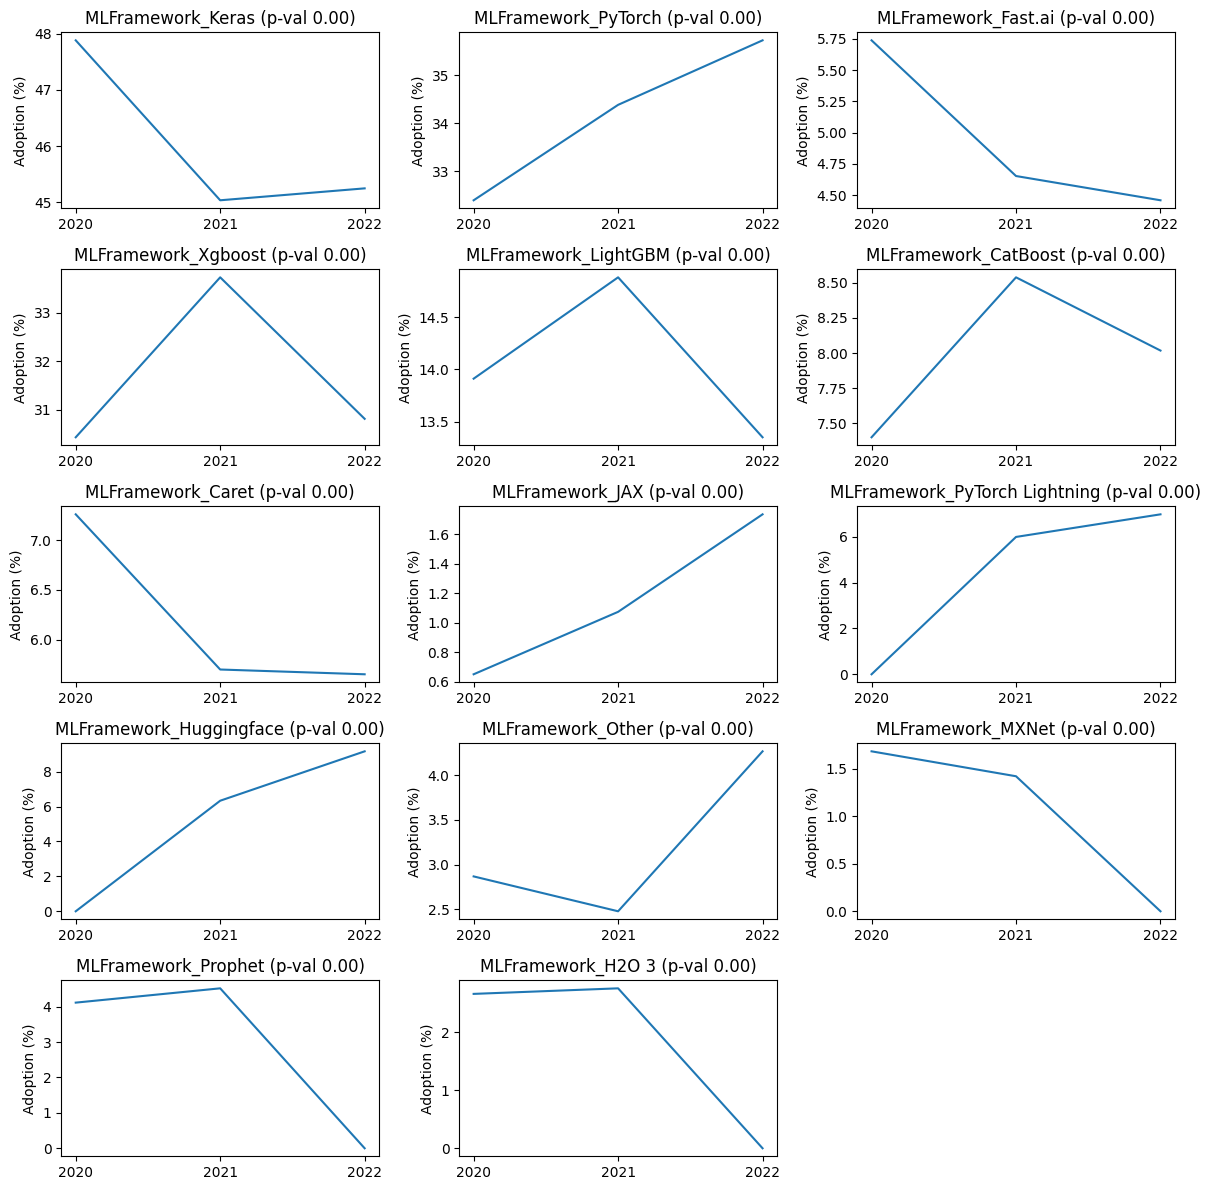

In [190]:
get_significant_changes("MLFramework_", plot_significant_only=True, ALPHA_LEVEL=ALPHA_LEVEL)

### Q) Is the representation of Higher education (Masters & above) among Industry Professionals with MLE/DS profile increasing ?

In [197]:
DATA_SCIENTIST_ROLES = ['Data Scientist', 'Research Scientist', 'Machine Learning Engineer', 'Machine Learning/ MLops Engineer']

In [214]:
survey_df.loc[survey_df["CurrentTitle"]=="Machine Learning/ MLops Engineer", "CurrentTitle"] = "Machine Learning Engineer"

In [239]:
survey_df.loc[survey_df["CurrentTitle"].isin(["Data Analyst (Business, Marketing, Financial, Quantitative, etc)","Data Analyst","Business Analyst"]), "CurrentTitle"] = "Data/Business Analyst"
# survey_df.loc[survey_df["CurrentTitle"]=="Data Analyst", "CurrentTitle"] = "Data/Business Analyst"

In [235]:
DATA_SCIENTIST_ROLES = ['Data Scientist', 'Research Scientist', 'Machine Learning Engineer', 'Data/Business Analyst']

In [245]:
ds_edu_df = survey_df[survey_df["CurrentTitle"].isin(DATA_SCIENTIST_ROLES)].groupby(["CurrentTitle", SURVEY_YEAR, "HighestEducation"], as_index=False).agg(rcount=("CurrentTitle","count"))
ds_edu_df["Share"] = ds_edu_df["rcount"]/ds_edu_df.groupby([SURVEY_YEAR, "CurrentTitle"])['rcount'].transform(sum)
ds_edu_df

,CurrentTitle,SurveyYear,HighestEducation,rcount,Share
0,Data Scientist,2020,Bachelor,648,0.242152
1,Data Scientist,2020,Higher than Master,458,0.171151
2,Data Scientist,2020,Lower than Bachelor,79,0.029522
3,Data Scientist,2020,Master,1369,0.511584
4,Data Scientist,2020,Other,122,0.045590
5,Data Scientist,2021,Bachelor,1089,0.301162
6,Data Scientist,2021,Higher than Master,592,0.163717
7,Data Scientist,2021,Lower than Bachelor,149,0.041206
8,Data Scientist,2021,Master,1726,0.477323
9,Data Scientist,2021,Other,60,0.016593


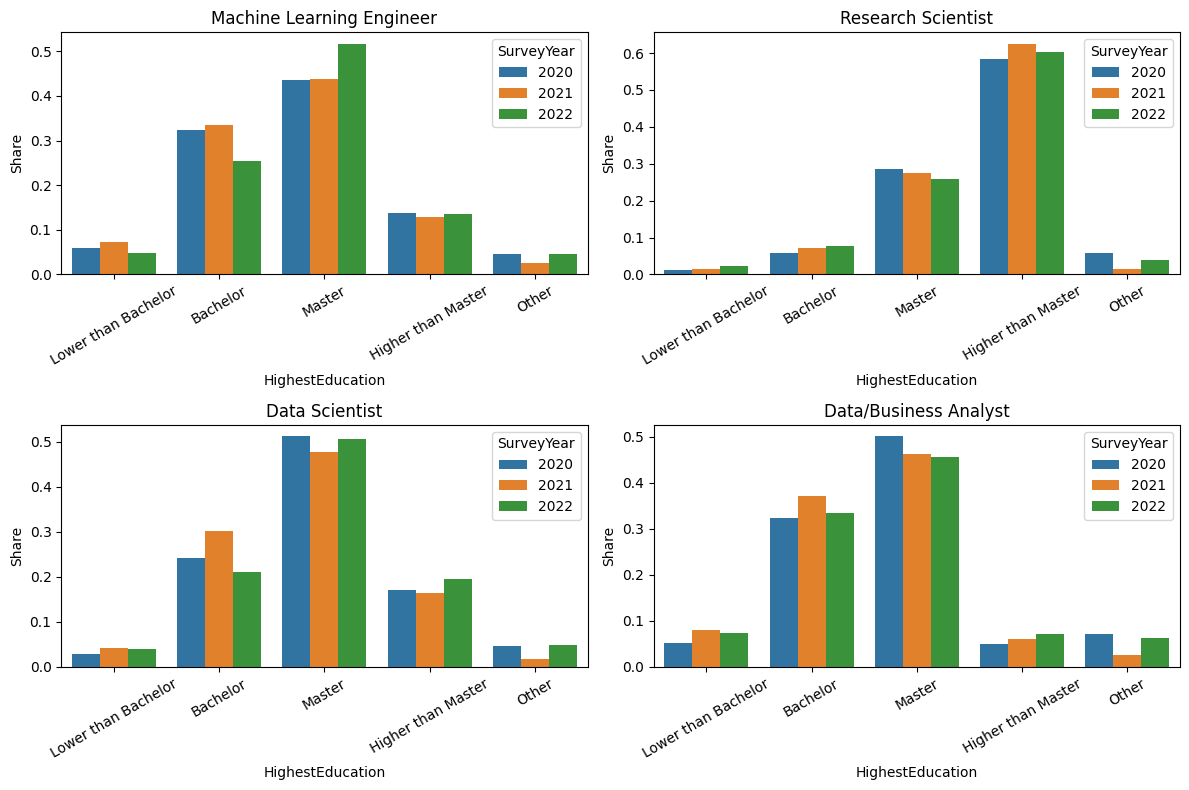

In [247]:
plt.figure(figsize=(12, 8))
EDU_ORDER = ["Lower than Bachelor", "Bachelor", "Master", "Higher than Master", "Other"]
plt.subplot(2,2,1)
sns.barplot(data=ds_edu_df[ds_edu_df["CurrentTitle"]=="Machine Learning Engineer"], x="HighestEducation", y="Share", hue=SURVEY_YEAR, order=EDU_ORDER);
plt.xticks(rotation=30);
plt.title("Machine Learning Engineer");
plt.subplot(2,2,2)
sns.barplot(data=ds_edu_df[ds_edu_df["CurrentTitle"]=="Research Scientist"], x="HighestEducation", y="Share", hue=SURVEY_YEAR, order=EDU_ORDER);
plt.xticks(rotation=30);
plt.title("Research Scientist");
plt.subplot(2,2,3)
sns.barplot(data=ds_edu_df[ds_edu_df["CurrentTitle"]=="Data Scientist"], x="HighestEducation", y="Share", hue=SURVEY_YEAR, order=EDU_ORDER);
plt.xticks(rotation=30);
plt.title("Data Scientist");
plt.subplot(2,2,4)
sns.barplot(data=ds_edu_df[ds_edu_df["CurrentTitle"]=="Data/Business Analyst"], x="HighestEducation", y="Share", hue=SURVEY_YEAR, order=EDU_ORDER);
plt.xticks(rotation=30);
plt.title("Data/Business Analyst");
plt.tight_layout()

In [270]:
def chi_2_test(data, dim1, dim2, metric):
    test_data = data.pivot(index=dim1, columns=dim2, values=metric).to_numpy()
    return chi2_contingency(test_data)

In [453]:
TITLE_FILTER = ds_edu_df["CurrentTitle"]=="Data Scientist"
EDU_FILTER = ds_edu_df["HighestEducation"].isin(["Bachelor", "Master"])
YEAR_FILTER = ds_edu_df[SURVEY_YEAR].isin(["2021","2022"])
FILTER = TITLE_FILTER&EDU_FILTER&YEAR_FILTER
stat, p, dof, expected = chi_2_test(ds_edu_df.loc[FILTER,["HighestEducation", SURVEY_YEAR, "rcount"]], SURVEY_YEAR, 'HighestEducation', 'rcount')
if p < ALPHA_LEVEL:
    print(r"Reject Null Hypothesis. P-val= %.4f, chi-squared stat= %.2f, df=%d" % (p, stat, dof))

[[1089 1726]
 [ 406  974]]
Reject Null Hypothesis. P-val= 0.0000, chi-squared stat= 34.26, df=1


In [374]:
TITLE_FILTER = ds_edu_df["CurrentTitle"]=="Machine Learning Engineer"
EDU_FILTER = ds_edu_df["HighestEducation"].isin(["Bachelor", "Master"])
YEAR_FILTER = ds_edu_df[SURVEY_YEAR].isin(["2021","2022"])
FILTER = TITLE_FILTER&EDU_FILTER&YEAR_FILTER
stat, p, dof, expected = chi_2_test(ds_edu_df.loc[FILTER,["HighestEducation", SURVEY_YEAR, "rcount"]], SURVEY_YEAR, 'HighestEducation', 'rcount')
if p < ALPHA_LEVEL:
    print(r"Reject Null Hypothesis. P-val= %.4f, chi-squared stat= %.2f, df=%d" % (p, stat, dof))

Reject Null Hypothesis. P-val= 0.0002, chi-squared stat= 13.87, df=1


Text(0.5, 1.0, '$\\chi^2$ Test Null Distribution')

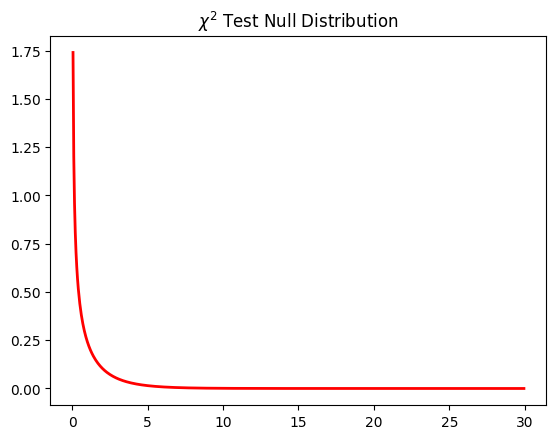

In [377]:
x = np.arange(0, 30, .05);
plt.plot(x, chi2.pdf(x, df=1), color='r', lw=2);
plt.title(r"$\chi^2$ Test Null Distribution")

#### There is a significant shift in the number of industry professionals (MLEs/Data Scientists) with advanced degrees (Master's and higher). 

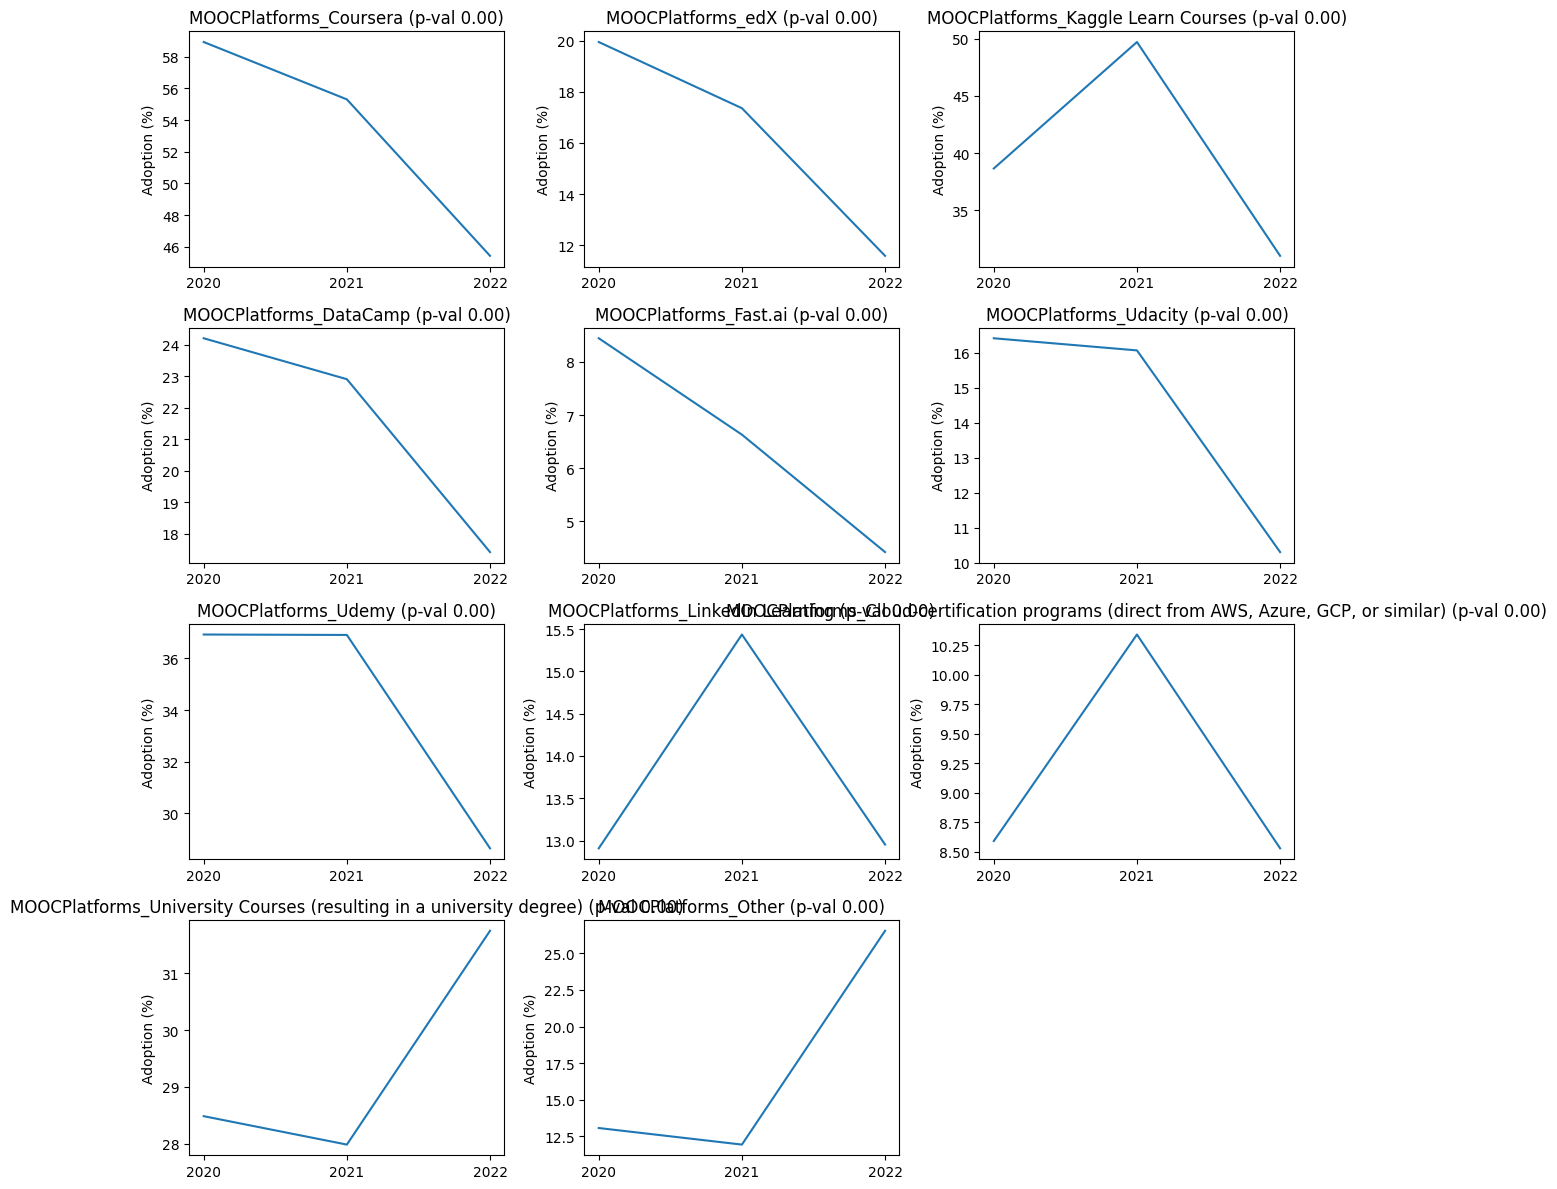

In [416]:
get_significant_changes("MOOCPlatforms_", plot_significant_only=True, ALPHA_LEVEL=ALPHA_LEVEL)

#### There is also a significant shift in the number of people opting for a University Degree to learn about Data Science, while the online MOOC platforms are seeing a decline in the adoption

### Q) Why are TPUs/accelerators gaining traction, and what might be causing that ? Specific projects that might be driving that ?

In [389]:
survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_GPUs"] = survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_NVIDIA GPUs"]
survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_TPUs"] = survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_Google Cloud TPUs"]
survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_Trainium Chips"] = survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_AWS Trainium Chips"]
survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_Inferentia Chips"] = survey_df.loc[survey_df[SURVEY_YEAR]=="2021", "HardwareUsed_AWS Inferentia Chips"]

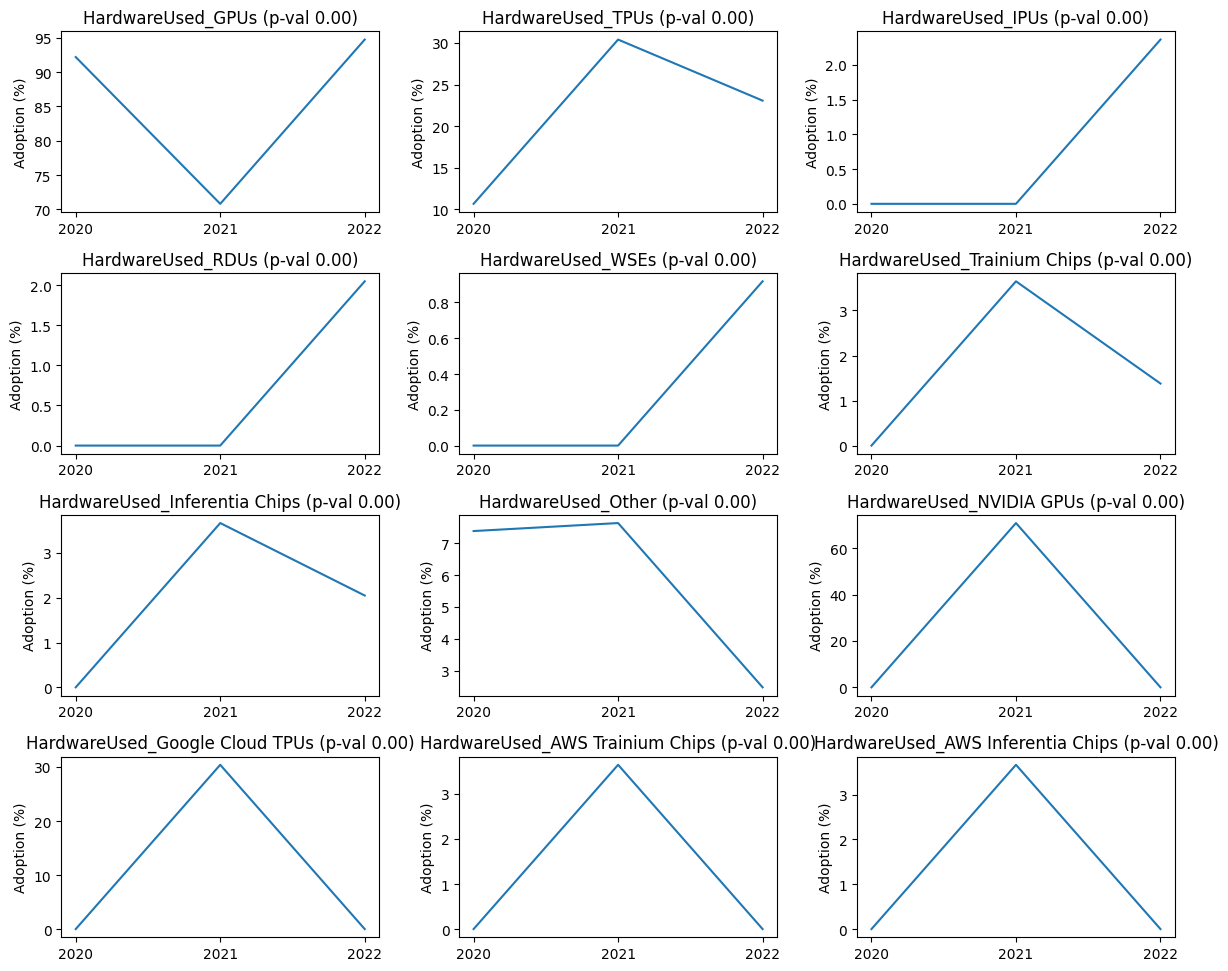

In [391]:
get_significant_changes("HardwareUsed_", plot_significant_only=True, ALPHA_LEVEL=ALPHA_LEVEL)

#### Finding: The usage of GPUs and TPUs has witnessed a higher adoption through the past few years. We see a statistically significant difference between adoption of GPUs and TPUs YoY

In [404]:
tpu_df["TPUUsageFrequency"].unique()

array(['2-5 times', '6-25 times', 'More than 25 times', 'Never', 'Once'],
      dtype=object)

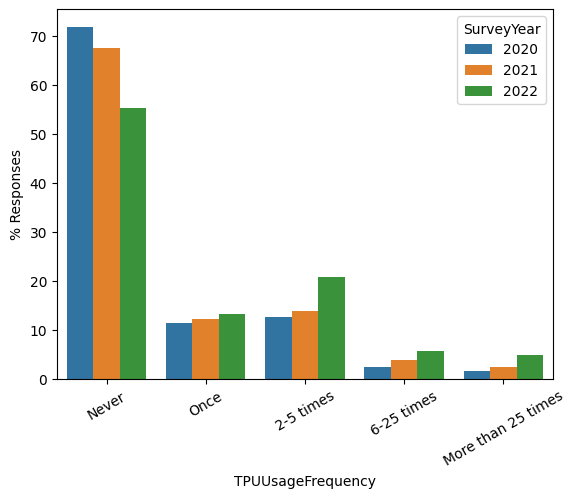

In [415]:
tpu_df = survey_df.groupby(["TPUUsageFrequency", SURVEY_YEAR], as_index=False).agg(rcount = ("TPUUsageFrequency", "count"))
tpu_df["Usage"] = 100*tpu_df["rcount"]/tpu_df.groupby([SURVEY_YEAR])['rcount'].transform(sum)
# tpu_df
sns.barplot(tpu_df, x="TPUUsageFrequency", y="Usage", hue="SurveyYear", order=['Never', 'Once', '2-5 times', '6-25 times', 'More than 25 times'])
plt.xticks(rotation=30);
plt.ylabel("% Responses");

In [456]:
def chi_2_test(data, dim1, dim2, metric):
    test_data = data.pivot(index=dim1, columns=dim2, values=metric).to_numpy()
#     print(data.pivot(index=dim1, columns=dim2, values=metric).to_numpy())
    return chi2_contingency(test_data)

In [457]:
stat, p, dof, expected = chi_2_test(tpu_df[tpu_df[SURVEY_YEAR].isin(["2021","2022"])], SURVEY_YEAR, 'TPUUsageFrequency', 'rcount')
if p < ALPHA_LEVEL:
    print(r"Reject Null Hypothesis. P-val= %.4f, chi-squared stat= %.2f, df=%d" % (p, stat, dof))

Reject Null Hypothesis. P-val= 0.0000, chi-squared stat= 319.79, df=4


Text(0.5, 1.0, '$\\chi^2$ Test Null Distribution')

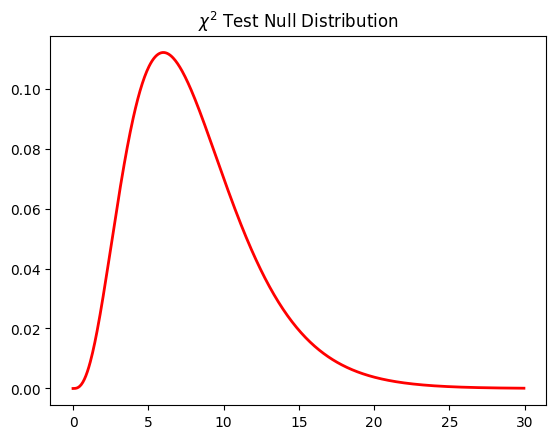

In [420]:
x = np.arange(0, 30, .05);
plt.plot(x, chi2.pdf(x, df=8), color='r', lw=2);
plt.title(r"$\chi^2$ Test Null Distribution")

#### There is a significant increase in the usage of TPUs YoY (Statistically significant)

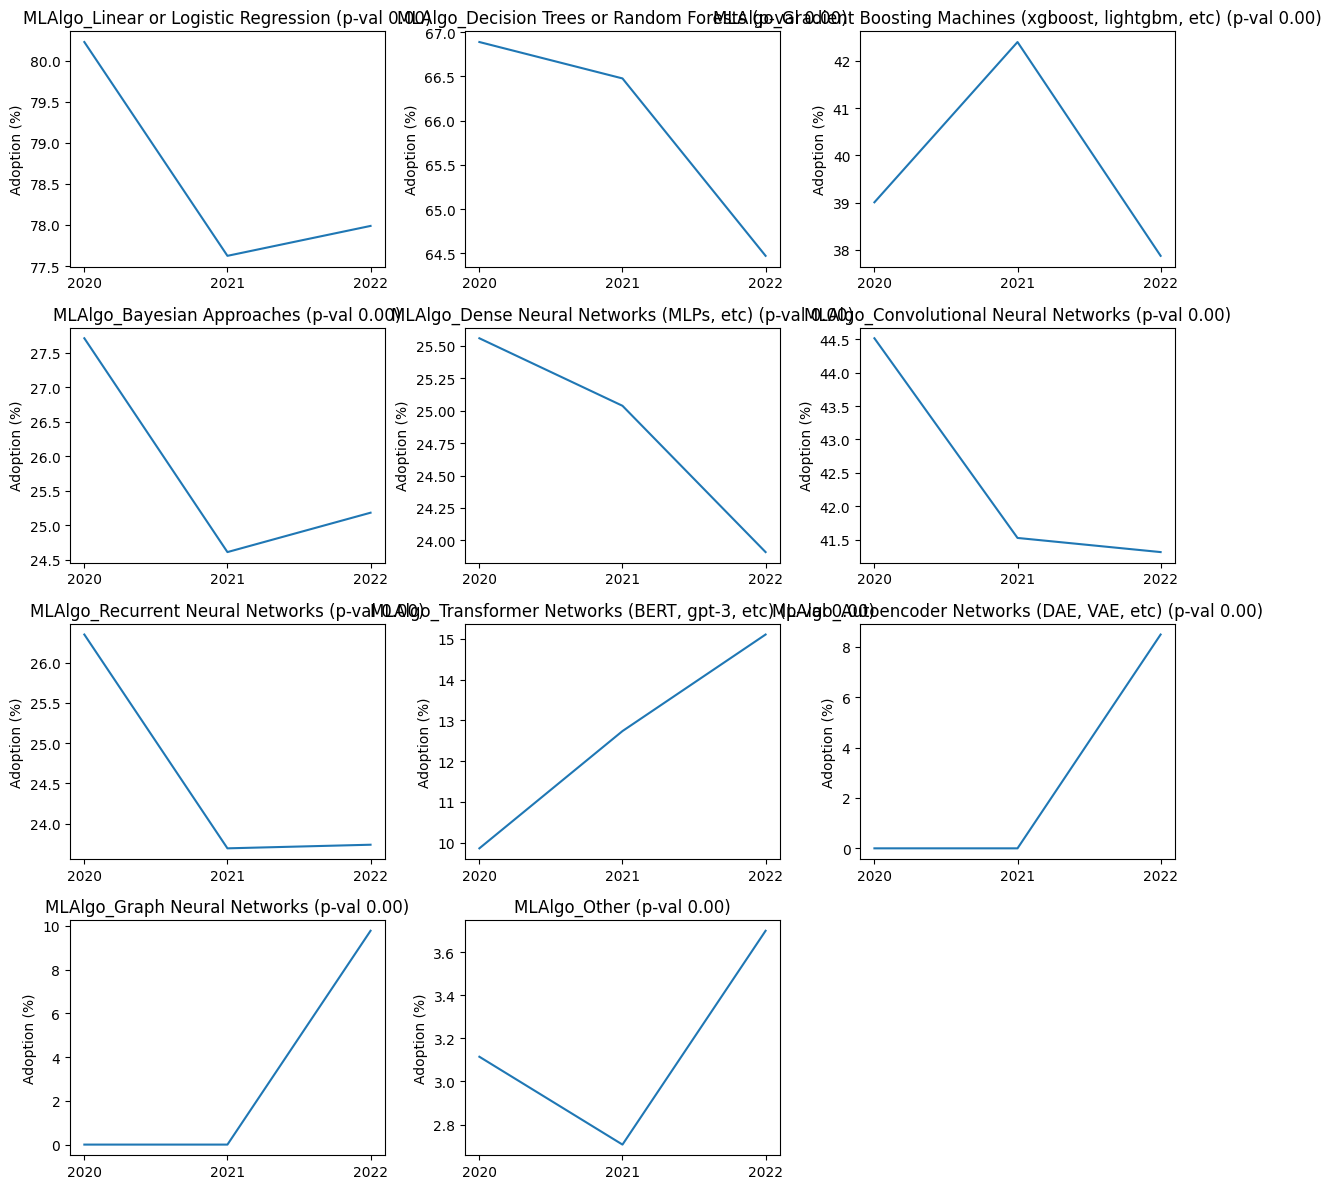

In [459]:
get_significant_changes("MLAlgo_", plot_significant_only=True, ALPHA_LEVEL=ALPHA_LEVEL)

#### With the increase in the adoption of advance algorithms having a large number of tunable parameters (sometimes in Millions), it becomes a requirement to use an accelerator or specialized hardware (TPU/GPU) to be practically able to train the algorithms.  It is clear from the above figure, that there is a large number of users adopting Transformer-based algorithms (BERT, GPT-3, etc), Graph NNs, etc

### Salary Exploration

In [354]:
ds_comp_edu_df = survey_df.loc[survey_df["CurrentTitle"].isin(["Machine Learning Engineer", "Data Scientist"]), ["AnnualComp(USD)", "CurrentTitle", "Country", "HighestEducation", SURVEY_YEAR]]

In [321]:
ds_comp_edu_df = ds_comp_edu_df.dropna()

In [322]:
ds_comp_edu_df[['min_w','max_w']]=ds_comp_edu_df["AnnualComp(USD)"].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.replace('>', '', regex=False).str.split('-', expand = True)
ds_comp_edu_df[['min_w','max_w']] = ds_comp_edu_df[['min_w','max_w']].astype('float')
ds_comp_edu_df['AverageCompensation']=(ds_comp_edu_df['min_w']+ds_comp_edu_df['max_w'])/2 + 0.5

In [348]:
ds_comp_edu_df.loc[ds_comp_edu_df["AverageCompensation"].isna(), "AverageCompensation"] = ds_comp_edu_df.loc[ds_comp_edu_df["AverageCompensation"].isna(), "min_w"]

In [299]:
ds_comp_edu_df["AnnualComp(USD)"].unique()

array(['125,000-149,999', '70,000-79,999', '$0-999', '10,000-14,999',
       '4,000-4,999', '> $500,000', '1,000-1,999', '60,000-69,999',
       '15,000-19,999', '40,000-49,999', '80,000-89,999',
       '100,000-124,999', '250,000-299,999', '50,000-59,999',
       '5,000-7,499', '2,000-2,999', '20,000-24,999', '150,000-199,999',
       '25,000-29,999', '200,000-249,999', '300,000-500,000',
       '90,000-99,999', '30,000-39,999', '7,500-9,999', '3,000-3,999',
       '$500,000-999,999', '300,000-499,999', '>$1,000,000'], dtype=object)

In [350]:
ds_comp_edu_in_df = ds_comp_edu_df[ds_comp_edu_df["Country"]=="India"]
ds_comp_edu_us_df = ds_comp_edu_df[ds_comp_edu_df["Country"]=="United States of America"]

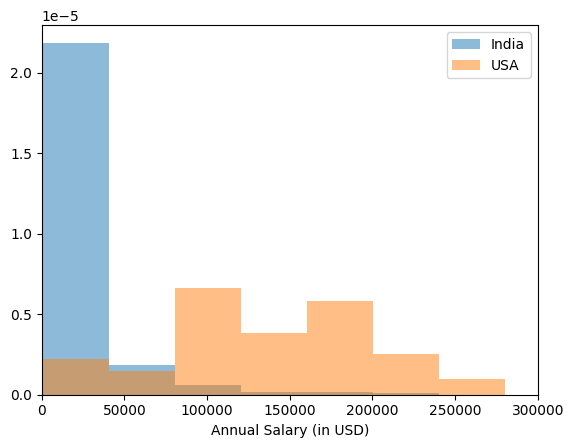

In [352]:
plt.hist(ds_comp_edu_in_df["AverageCompensation"], bins=25, alpha=0.5, density=True, label="India");
plt.hist(ds_comp_edu_us_df["AverageCompensation"], bins=25, alpha=0.5, density=True, label="USA");
plt.legend();
plt.xlabel("Annual Salary (in USD)");
plt.xlim([0,300000]);

In [351]:
TITLE_FILTER = ds_comp_edu_in_df["CurrentTitle"]=="Data Scientist"
ds_comp_edu_in_df[]

,AnnualComp(USD),CurrentTitle,Country,HighestEducation,SurveyYear,min_w,max_w,AverageCompensation
39,"> $500,000",Data Scientist,India,Bachelor,2020,500000.0,NaN,500000.0
59,"10,000-14,999",Machine Learning Engineer,India,Bachelor,2020,10000.0,14999.0,12500.0
77,$0-999,Data Scientist,India,Bachelor,2020,0.0,999.0,500.0
94,$0-999,Machine Learning Engineer,India,Other,2020,0.0,999.0,500.0
109,$0-999,Machine Learning Engineer,India,Bachelor,2020,0.0,999.0,500.0
...,...,...,...,...,...,...,...,...
23855,"1,000-1,999",Data Scientist,India,Bachelor,2022,1000.0,1999.0,1500.0
23864,"40,000-49,999",Data Scientist,India,Master,2022,40000.0,49999.0,45000.0
23931,"1,000-1,999",Data Scientist,India,Master,2022,1000.0,1999.0,1500.0
23934,"30,000-39,999",Data Scientist,India,Bachelor,2022,30000.0,39999.0,35000.0


In [311]:
ds_comp_edu_us_df.groupby(["Country", SURVEY_YEAR]).agg(c = ("Country","count")).sort_values(by="c", ascending=False)

c
Country                  SurveyYear     
United States of America 2021        547
                         2020        486
                         2022        435